In [1]:
import pandas as pd
import numpy as np
import os 

In [2]:
from gprofiler import GProfiler
gp = GProfiler(return_dataframe=True)

In [3]:
#import package
from package.preprocessing import IO

In [4]:
os.listdir("./input/")

['BRCA_proteomics_gene_abundance_log2_reference_intensity_normalized_Tumor.txt',
 'CCRCC_proteomics_gene_abundance_log2_reference_intensity_normalized_Normal.txt',
 'CCRCC_proteomics_gene_abundance_log2_reference_intensity_normalized_Tumor.txt',
 'COAD_proteomics_gene_abundance_log2_reference_intensity_normalized_Normal.txt',
 'COAD_proteomics_gene_abundance_log2_reference_intensity_normalized_Tumor.txt',
 'GBM_proteomics_gene_abundance_log2_reference_intensity_normalized_Tumor.txt',
 'HNSCC_proteomics_gene_abundance_log2_reference_intensity_normalized_Normal.txt',
 'HNSCC_proteomics_gene_abundance_log2_reference_intensity_normalized_Tumor.txt',
 'LSCC_proteomics_gene_abundance_log2_reference_intensity_normalized_Normal.txt',
 'LSCC_proteomics_gene_abundance_log2_reference_intensity_normalized_Tumor.txt',
 'LUAD_proteomics_gene_abundance_log2_reference_intensity_normalized_Normal.txt',
 'LUAD_proteomics_gene_abundance_log2_reference_intensity_normalized_Tumor.txt',
 'OV_proteomics_gene

# IO

In [5]:
input_path = "./input/"
export_title = "UCEC "

In [6]:
Normal = IO.read_file(input_path+ "UCEC_proteomics_gene_abundance_log2_reference_intensity_normalized_Normal.txt").set_index("idx").T
Tumour = IO.read_file(input_path+ "UCEC_proteomics_gene_abundance_log2_reference_intensity_normalized_Tumor.txt").set_index("idx").T

In [7]:
x = pd.concat([Normal, Tumour], axis = 0).reset_index(drop = True)
y = pd.Series(np.concatenate([np.zeros_like(Normal.index), np.ones_like(Tumour.index)], axis = 0)) == 1

In [8]:
x.head(5)

idx,ENSG00000000003.15,ENSG00000000419.12,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,ENSG00000001461.17,...,ENSG00000282651.2,ENSG00000283154.2,ENSG00000283632.3,ENSG00000284194.3,ENSG00000284691.1,ENSG00000284753.2,ENSG00000285025.1,ENSG00000285723.1,ENSG00000286053.1,ENSG00000286140.1
0,23.279176,26.192883,22.466850,NaN,22.019597,28.104751,24.202323,25.545561,20.348043,NaN,...,24.299871,NaN,21.770704,24.253174,NaN,NaN,20.436356,22.094697,20.456521,23.049767
1,23.741794,26.185906,22.620497,NaN,21.940559,27.731776,25.128500,25.866013,20.201667,NaN,...,23.664672,NaN,22.333587,24.459419,NaN,NaN,20.606363,22.011337,20.967239,23.461609
2,23.667766,26.451034,23.462588,NaN,22.166679,27.542555,25.225548,26.011016,20.365316,21.597552,...,21.833733,NaN,21.890136,24.633252,18.609660,NaN,NaN,22.289742,NaN,23.113621
3,23.223811,25.751077,23.446972,NaN,22.108377,28.087341,25.138681,25.782471,20.312129,21.666140,...,22.152724,NaN,22.377159,24.255274,17.699678,NaN,NaN,22.116224,NaN,23.366231
4,23.091641,25.321391,23.333753,NaN,22.132529,28.718813,25.759247,25.329344,20.427391,20.112844,...,22.452918,NaN,22.655824,24.024669,NaN,NaN,20.309615,20.513113,21.188838,23.830583


In [9]:
x.columns = [col.split(".")[0] for col in x.columns]
gene_name = gp.convert(query = x.columns.to_list())["name"]
matched = gene_name == "None"
x.columns = x.columns.where(matched, gene_name) 

In [10]:
x.head(5)

,TSPAN6,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,NFYA,NIPAL3,...,IGHV5-10-1,IQCJ-SCHIP1,EXOC3L2,SCO2,ENSG00000284691,EEF1AKMT4,MIURF,ENSG00000285723,ASDURF,DERPC
0,23.279176,26.192883,22.466850,NaN,22.019597,28.104751,24.202323,25.545561,20.348043,NaN,...,24.299871,NaN,21.770704,24.253174,NaN,NaN,20.436356,22.094697,20.456521,23.049767
1,23.741794,26.185906,22.620497,NaN,21.940559,27.731776,25.128500,25.866013,20.201667,NaN,...,23.664672,NaN,22.333587,24.459419,NaN,NaN,20.606363,22.011337,20.967239,23.461609
2,23.667766,26.451034,23.462588,NaN,22.166679,27.542555,25.225548,26.011016,20.365316,21.597552,...,21.833733,NaN,21.890136,24.633252,18.609660,NaN,NaN,22.289742,NaN,23.113621
3,23.223811,25.751077,23.446972,NaN,22.108377,28.087341,25.138681,25.782471,20.312129,21.666140,...,22.152724,NaN,22.377159,24.255274,17.699678,NaN,NaN,22.116224,NaN,23.366231
4,23.091641,25.321391,23.333753,NaN,22.132529,28.718813,25.759247,25.329344,20.427391,20.112844,...,22.452918,NaN,22.655824,24.024669,NaN,NaN,20.309615,20.513113,21.188838,23.830583


In [11]:
y.head(5)

0    False
1    False
2    False
3    False
4    False
dtype: bool

# Preprocessing

### power transform

In [12]:
x = np.power(2, x)

### Impute

In [13]:
from package.preprocessing import impute, bagging

In [14]:
simple = impute.simple_imputer(threshold = 0.5, strategy = "constant")
x, y = simple.fit_transform(x, y)

In [15]:
x.head(5)

,TSPAN6,DPM1,SCYL3,FGR,CFH,FUCA2,GCLC,NFYA,LAS1L,ENPP4,...,ACACA,C11orf98,MRM1,MRPL45,IGHV3-64D,IGHV5-10-1,EXOC3L2,SCO2,ENSG00000285723,DERPC
0,1.017959e+07,7.670850e+07,5.796897e+06,4.251665e+06,2.886511e+08,1.930302e+07,4.897565e+07,1.334662e+06,1.987960e+07,1.634934e+07,...,1.233651e+07,7.789334e+06,1.735174e+06,1.929823e+07,7.786854e+06,2.065334e+07,3.577955e+06,1.999553e+07,4.478852e+06,8.683030e+06
1,1.402788e+07,7.633842e+07,6.448342e+06,4.025005e+06,2.228929e+08,3.668025e+07,6.115693e+07,1.205890e+06,2.008701e+07,1.832243e+07,...,1.401036e+07,8.388933e+06,1.677414e+06,2.010734e+07,5.254977e+06,1.329769e+07,5.285421e+06,2.306848e+07,4.227394e+06,1.155176e+07
2,1.332624e+07,9.173912e+07,1.155960e+07,4.707988e+06,1.954948e+08,3.923255e+07,6.762325e+07,1.350738e+06,2.002652e+07,1.586414e+07,...,1.187898e+07,6.736936e+06,2.069405e+06,2.193663e+07,5.291677e+06,3.737734e+06,3.886758e+06,2.602243e+07,5.127206e+06,9.075971e+06
3,9.796340e+06,5.647375e+07,1.143515e+07,4.521521e+06,2.851886e+08,3.694001e+07,5.771613e+07,1.301847e+06,2.058633e+07,1.829515e+07,...,1.459368e+07,5.546785e+06,2.094822e+06,1.536663e+07,4.328414e+06,4.662668e+06,5.447484e+06,2.002466e+07,4.546182e+06,1.081276e+07
4,8.938745e+06,4.192743e+07,1.057206e+07,4.597854e+06,4.417985e+08,5.679446e+07,4.215920e+07,1.410125e+06,1.439270e+07,1.670591e+07,...,1.716493e+07,1.068885e+07,1.926701e+06,2.685889e+07,1.085181e+07,5.741187e+06,6.608192e+06,1.706656e+07,1.496451e+06,1.491833e+07


### Bagging

bagger = bagging.bagger()
x, y = bagger.fit_transform(x, y)

print(bagger.see("AAMP")) # AAMP is a feature
print(bagger.see("AA"))   # no AA but some other feature start with AA
print(bagger.see("AA*"))  # * can list all features start with ZN
try:
    print(bagger.see("ERROR"))
except:
    print("ERROR is not a feature in x, it will raise an error")

# Feature selection

In [16]:
from package.selection.ensemble import selector
from package.selection.Volcano import Volcano_selection

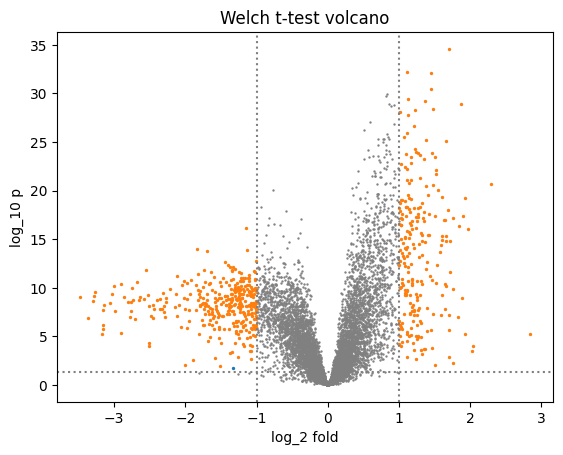

In [17]:
vol = Volcano_selection(strategy = "p", log_domain=False, absolute= False)
vol_importance = vol.select(x, y, -1)
vol.plotting()

In [18]:
ensemble_selector = selector()
important_feature, importance = ensemble_selector.select(x, y, 100)

Using  c45  to select.


100%|██████████| 8889/8889 [00:19<00:00, 454.27it/s]


c45  is done.

Using  RF_gini  to select.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 11234 tasks  

RF_gini  is done.

Using  AdaBoost  to select.
I don't have a progress bar but I am running
AdaBoost  is done.

Using  Lasso  to select.


  4%|▍         | 43/999 [00:09<03:34,  4.46it/s]


all coefficient are dead, terminated.
Lasso  is done.

Using  multi_Lasso  to select.


C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.138e-02, tolerance: 3.725e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.147e-02, tolerance: 3.725e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-pac

multi_Lasso  is done.

Using  SVM  to select.
SVM  is done.

Using  XGboost  to select.


C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(

XGboost  is done.

Using  Lightgbm  to select.
[LightGBM] [Info] Number of positive: 105, number of negative: 44
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.055505 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 430009
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 8889
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

In [19]:
important_feature

,DT_score_c45,RandomForest_gini,AdaBoost64,LassoLinear,multi_Lasso,SVM,XGboost,Lightgbm
0,PM20D1,INF2,S100A16,NFIA,WNK2,NCAM1,INF2,LAMC2
1,EPHX1,SFN,HTRA3,DAG1,AP2A1,PZP,LAMC2,EPPK1
2,GCAT,LAMC2,CORO2A,MECP2,NFIC,ZNF217,SFN,BAX
3,LAMB3,HK2,LMO7,SORBS2,NFIA,UBE3A,HK2,INF2
4,LAMC2,EPPK1,GSDMB,CIRBP,ALDH1A1,TCF7L2,CEP68,EVPL
...,...,...,...,...,...,...,...,...
95,THBS2,GNPAT,NaN,UPF2,PAIP2B,GZMM,NaN,ENAH
96,MYH14,FAM114A2,NaN,MPP7,TBC1D4,NEDD1,NaN,NUDCD3
97,SFN,PLCB1,NaN,SERPINB5,EIF2D,MAN2C1,NaN,PHF6
98,FLNB,MTR,NaN,GYG1,RAI14,AP1M1,NaN,ZNF330


In [20]:
importance

,DT_score_c45,RandomForest_gini,AdaBoost64,LassoLinear,multi_Lasso,SVM,XGboost,Lightgbm
PM20D1,1.009861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EPHX1,1.009515,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCAT,1.008121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LAMB3,1.007351,0.004723,NaN,NaN,NaN,NaN,NaN,NaN
LAMC2,1.006546,0.008298,0.046875,NaN,NaN,NaN,0.191798,17.0
...,...,...,...,...,...,...,...,...
SAAL1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
ENAH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
NUDCD3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
PHF6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


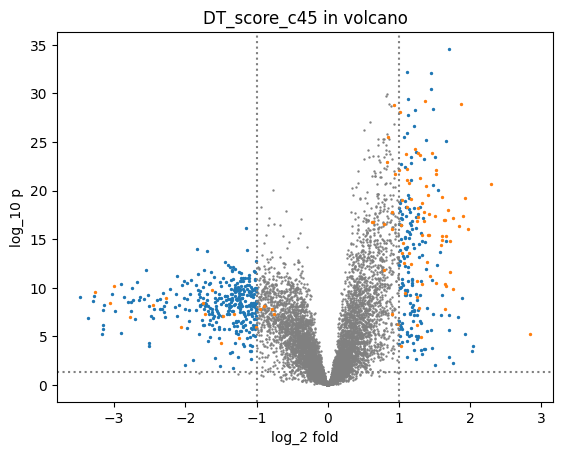

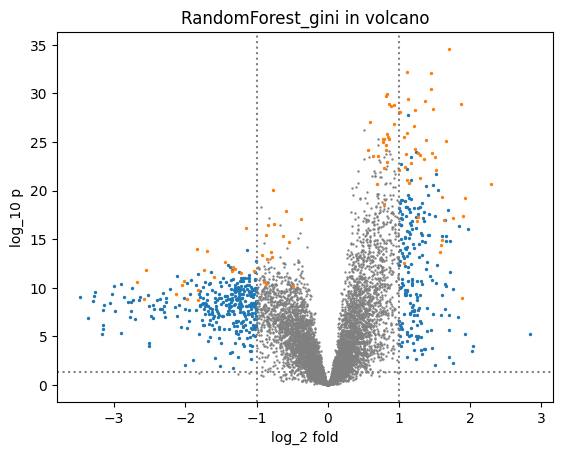

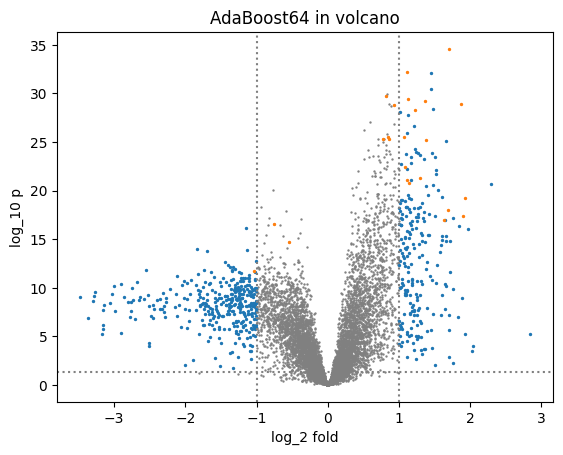

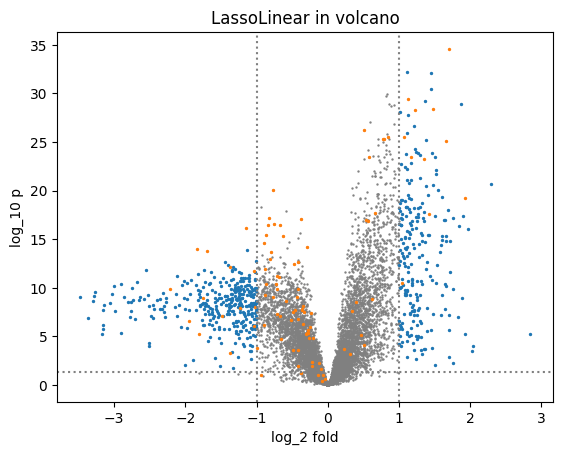

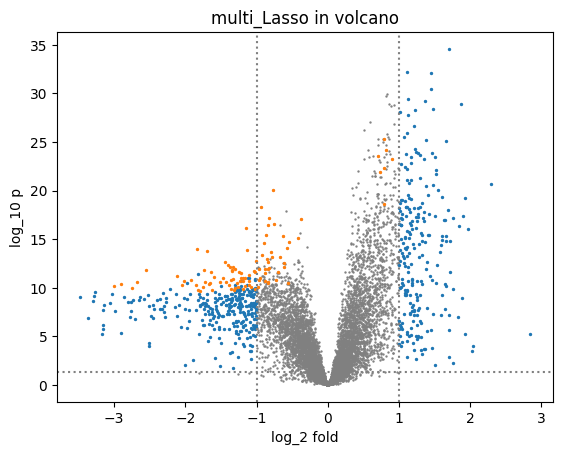

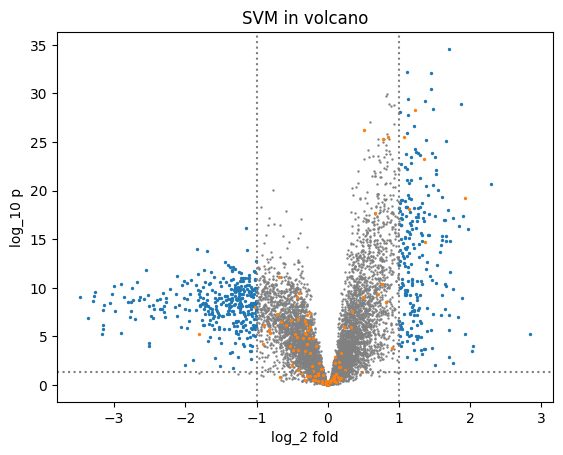

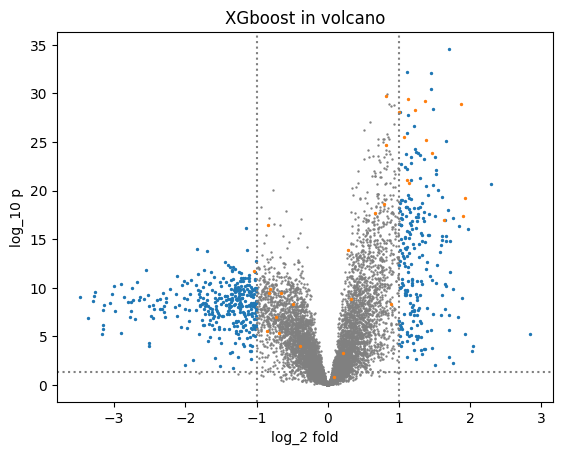

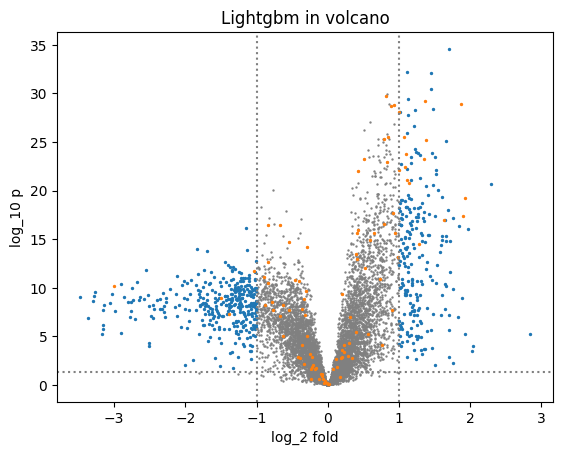

In [21]:
for method in importance:
    vol.plotting(
        external=True,
        external_score=importance[method].dropna(), 
        title = method+" in volcano",
        show = True, 
        saving = True, 
        save_path = "./output/images/"+ export_title)

### Modeling

In [22]:
from sklearn.svm import SVC
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [23]:
x = (x-x.mean())/x.std()

In [24]:
class SVC_tuner():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __call__(self, trial):
        svc_c = trial.suggest_float("svc_c", 1e-5, 1e3, log=True)
        classifier_obj = SVC(C = svc_c, cache_size = 1e+3, class_weight = "balanced", gamma="auto", probability=True)
        
        score = cross_val_score(classifier_obj, self.x, self.y, n_jobs=-1, cv=5, scoring = "neg_log_loss")#
        accuracy = score.mean()
        return accuracy

In [25]:
svm_performance = []
for k in [5, 10, 20]:
    performance = {}
    for method in important_feature.columns:
        top_k = important_feature.head(k)[method].dropna()
        task = SVC_tuner(x[top_k], y)
        study = optuna.create_study(direction="maximize")
        study.optimize(task, n_trials=200)
        
        best_svc_c = study.best_trial.params["svc_c"]
        
        best_svc = SVC(C = best_svc_c, probability = True, cache_size = 1e+3, class_weight = "balanced", gamma="auto").fit(x[top_k], y)
        prob = best_svc.predict_proba(x[top_k])

        performance[method] = roc_auc_score(y, (prob[:, 1] +(1-prob[:, 0]))/2)
    svm_performance.append(pd.Series(performance, name = "top"+ str(k)))
svm_performance


[I 2024-05-26 17:35:12,513] A new study created in memory with name: no-name-77945876-5be8-44d2-8ff1-8d5d482fa5fc
[I 2024-05-26 17:35:16,516] Trial 0 finished with value: -0.21501548643681695 and parameters: {'svc_c': 0.14099901020957173}. Best is trial 0 with value: -0.21501548643681695.
[I 2024-05-26 17:35:18,353] Trial 1 finished with value: -0.6286979231323507 and parameters: {'svc_c': 0.005905584207498606}. Best is trial 0 with value: -0.21501548643681695.
[I 2024-05-26 17:35:18,396] Trial 2 finished with value: -0.6126535244592394 and parameters: {'svc_c': 0.00020315154268350436}. Best is trial 0 with value: -0.21501548643681695.
[I 2024-05-26 17:35:18,430] Trial 3 finished with value: -0.17201704694270514 and parameters: {'svc_c': 1.846530847693699}. Best is trial 3 with value: -0.17201704694270514.
[I 2024-05-26 17:35:18,471] Trial 4 finished with value: -0.620892049151331 and parameters: {'svc_c': 1.954470994571041e-05}. Best is trial 3 with value: -0.17201704694270514.
[I 202

[DT_score_c45         0.991126
 RandomForest_gini    0.995887
 AdaBoost64           1.000000
 LassoLinear          0.986797
 multi_Lasso          0.992424
 SVM                  0.936797
 XGboost              0.998268
 Lightgbm             0.997403
 Name: top5, dtype: float64,
 DT_score_c45         0.998485
 RandomForest_gini    0.996970
 AdaBoost64           1.000000
 LassoLinear          0.999784
 multi_Lasso          0.991558
 SVM                  1.000000
 XGboost              0.998485
 Lightgbm             0.998918
 Name: top10, dtype: float64,
 DT_score_c45         0.999567
 RandomForest_gini    0.998052
 AdaBoost64           1.000000
 LassoLinear          1.000000
 multi_Lasso          0.991991
 SVM                  0.999784
 XGboost              0.998268
 Lightgbm             0.998918
 Name: top20, dtype: float64]

In [26]:
svm_performance = pd.concat(svm_performance, axis = 1)

### unbagging
important_feature = important_feature.map(bagger.unbagging) 

### g:profiler

In [27]:
gp_enrichment_result = []
for method in important_feature.columns:
    gp_result = gp.profile(query = important_feature[method].dropna().to_list()).sort_values("p_value")
    gp_result["method"] = method
    gp_enrichment_result.append(gp_result[["method", "source", "native", "parents", "p_value", "description", "intersection_size"]])
gp_enrichment_result = pd.concat(gp_enrichment_result, axis = 0).reset_index(drop = True)
gp_enrichment_result


,method,source,native,parents,p_value,description,intersection_size
0,DT_score_c45,GO:CC,GO:0005576,[GO:0110165],6.368658e-25,"""The space external to the outermost structure...",68
1,DT_score_c45,GO:CC,GO:0005615,"[GO:0005576, GO:0110165]",3.048576e-23,"""That part of a multicellular organism outside...",60
2,DT_score_c45,GO:CC,GO:0070062,"[GO:0005615, GO:1903561]",3.487743e-20,"""A vesicle that is released into the extracell...",47
3,DT_score_c45,GO:CC,GO:1903561,"[GO:0031982, GO:0065010]",5.624651e-20,"""Any vesicle that is part of the extracellular...",47
4,DT_score_c45,GO:CC,GO:0065010,"[GO:0043227, GO:0043230]",5.737005e-20,"""Organized structure of distinctive morphology...",47
...,...,...,...,...,...,...,...
400,Lightgbm,HPA,HPA:0471441,[HPA:0470000],3.606881e-02,skin 2; fibrohistiocytic cells[≥Low],18
401,Lightgbm,HPA,HPA:0461412,[HPA:0461411],4.320428e-02,skin 1; cells in spinous layer[≥Medium],13
402,Lightgbm,HPA,HPA:0471393,[HPA:0471392],4.490189e-02,skin 2; cells in basal layer[High],9
403,Lightgbm,HPA,HPA:0291161,[HPA:0290000],4.535385e-02,liver; cholangiocytes[≥Low],43


# Output

In [28]:
important_feature.to_csv("./output/"+export_title+ " important feature.csv")
importance.to_csv("./output/"+export_title+ " importance.csv")
gp_enrichment_result.to_csv("./output/"+export_title+ " g_prophiler.csv")
svm_performance.to_csv("./output/"+export_title+ " rbfSVM_performance.csv")
vol_importance.to_csv("./output/"+export_title+ " volcano_foldchange.csv")